## Horses or Humans

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

In [2]:
# training data

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /content/horse-or-human.zip

--2021-10-07 05:36:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/content/horse-or-human.zip’

/content/horse-or-h 100%[===================>] 142.65M   189MB/s    in 0.8s    

2021-10-07 05:36:56 (189 MB/s) - ‘/content/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
# validation data

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /content/validation-horse-or-human.zip

--2021-10-07 05:36:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.195.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/content/validation-horse-or-human.zip’

/content/validation 100%[===================>]  10.95M  --.-KB/s    in 0.09s   

2021-10-07 05:36:56 (116 MB/s) - ‘/content/validation-horse-or-human.zip’ saved [11480187/11480187]



In [2]:
# content -> train-horse-or-human -> horses -> horse images
# content -> train-horse-or-human -> humans -> human images

import os
import zipfile

local_zip = '/content/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/train-horse-or-human')
zip_ref.close()

In [3]:
# content -> valid-horse-or-human -> horses -> horse images
# content -> valid-horse-or-human -> humans -> human images

local_zip = '/content/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/valid-horse-or-human')
zip_ref.close()

In [4]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/content/train-horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/content/train-horse-or-human/humans')

In [5]:
# Directory with our validation horse pictures
valid_horse_dir = os.path.join('/content/valid-horse-or-human/horses')

# Directory with our validation human pictures
valid_human_dir = os.path.join('/content/valid-horse-or-human/humans')

In [6]:
# checking out file names in horse and human training folders

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse27-8.png', 'horse01-1.png', 'horse42-1.png', 'horse09-6.png', 'horse20-9.png', 'horse24-8.png', 'horse41-0.png', 'horse14-2.png', 'horse50-8.png', 'horse09-5.png']
['human04-07.png', 'human07-07.png', 'human16-22.png', 'human15-06.png', 'human13-12.png', 'human10-27.png', 'human14-11.png', 'human11-15.png', 'human09-13.png', 'human13-15.png']


In [7]:
# checking out file names in horse and human validation folders

valid_horse_names = os.listdir(valid_horse_dir)
print(valid_horse_names[:10])

valid_human_names = os.listdir(valid_human_dir)
print(valid_human_names[:10])

['horse3-070.png', 'horse4-159.png', 'horse3-326.png', 'horse6-198.png', 'horse3-440.png', 'horse4-043.png', 'horse4-495.png', 'horse3-255.png', 'horse6-218.png', 'horse4-530.png']
['valhuman01-17.png', 'valhuman04-01.png', 'valhuman01-10.png', 'valhuman05-18.png', 'valhuman02-15.png', 'valhuman03-18.png', 'valhuman04-18.png', 'valhuman05-09.png', 'valhuman04-19.png', 'valhuman05-05.png']


In [8]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [10]:
print('total validation horse images:', len(os.listdir(valid_horse_dir)))
print('total validation human images:', len(os.listdir(valid_human_dir)))

total validation horse images: 128
total validation human images: 128


In [11]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

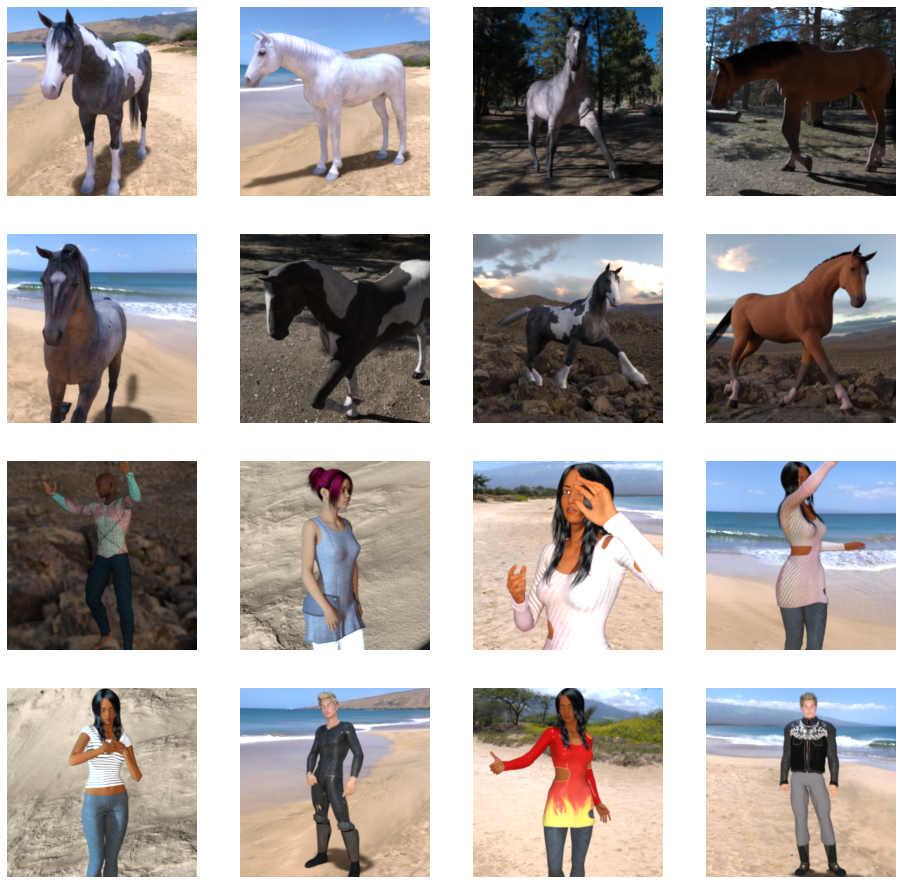

In [12]:
# display a batch of 8 horse and 8 human pictures

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [13]:
# input shape is the desired size of the image 300x300 with 3 channels

img_height = 300
img_width = 300
num_classes = 1

In [14]:
model = Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [16]:
optimizer   = tf.keras.optimizers.RMSprop(learning_rate=0.001)
loss        = tf.keras.losses.BinaryCrossentropy()
metrics     = ['accuracy']

In [17]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)                 # all images rescaled by 1./255

train_generator = train_datagen.flow_from_directory(
                          '/content/train-horse-or-human/',       # directory for training images
                          target_size=(300, 300),                 # same as model input size image
                          batch_size=128,                         # batch of 128
                          seed=20,                                # random seed
                          class_mode='binary')                    # since we use binary_crossentropy loss, we need binary labels

Found 1027 images belonging to 2 classes.


In [19]:
valid_datagen = ImageDataGenerator(rescale=1/255)

valid_generator = valid_datagen.flow_from_directory(
                          '/content/valid-horse-or-human/', 
                          target_size=(300, 300),  
                          batch_size=32,
                          seed=20,
                          class_mode='binary')

Found 256 images belonging to 2 classes.


In [20]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=7)
reduce_lr         = ReduceLROnPlateau(monitor='val_loss', patience=7, min_lr=0.001, mode='min', verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [22]:
epochs = 20
callbacks = [early_stopping, reduce_lr, model_checkpoint]

In [23]:
history = model.fit(train_generator,
                  # steps_per_epoch=8,
                    validation_data = valid_generator,
                  # validation_steps=8,
                    verbose = 1,
                    epochs = epochs,
                    callbacks = callbacks)

Epoch 1/20
9/9 [==============================] - 15s 1s/step - loss: 0.8065 - accuracy: 0.5531 - val_loss: 0.4818 - val_accuracy: 0.8242
Epoch 2/20
9/9 [==============================] - 9s 978ms/step - loss: 0.8323 - accuracy: 0.7128 - val_loss: 0.5767 - val_accuracy: 0.8398
Epoch 3/20
9/9 [==============================] - 9s 1s/step - loss: 0.4637 - accuracy: 0.7984 - val_loss: 0.5083 - val_accuracy: 0.8164
Epoch 4/20
9/9 [==============================] - 9s 970ms/step - loss: 0.3731 - accuracy: 0.9007 - val_loss: 0.5088 - val_accuracy: 0.8320
Epoch 5/20
9/9 [==============================] - 9s 972ms/step - loss: 0.9993 - accuracy: 0.8393 - val_loss: 0.9558 - val_accuracy: 0.7617
Epoch 6/20
9/9 [==============================] - 9s 980ms/step - loss: 0.2263 - accuracy: 0.9231 - val_loss: 1.1669 - val_accuracy: 0.7812
Epoch 7/20
9/9 [==============================] - 9s 974ms/step - loss: 0.4262 - accuracy: 0.9017 - val_loss: 0.4229 - val_accuracy: 0.8398
Epoch 8/20
9/9 [=========

<Figure size 432x288 with 0 Axes>

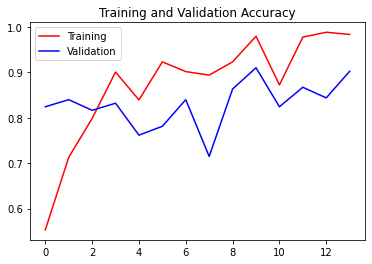

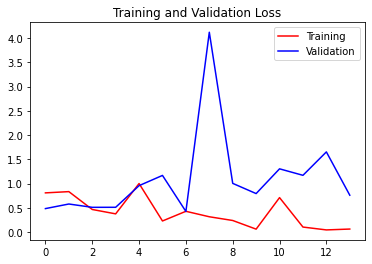

<Figure size 432x288 with 0 Axes>

In [24]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [ ]:
# load image to test

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving hqdefault.jpg to hqdefault (1).jpg
[0.]
hqdefault.jpg is a horse


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


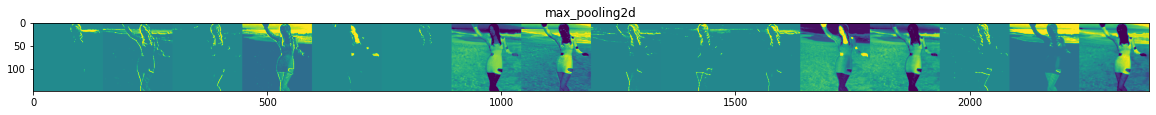

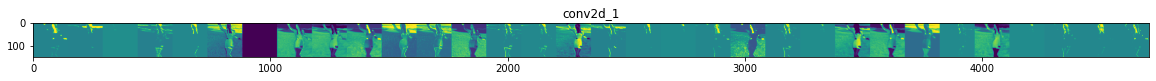

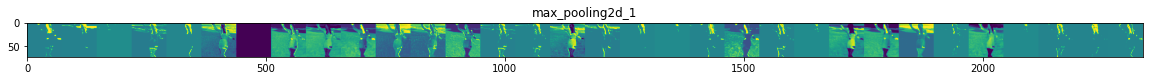

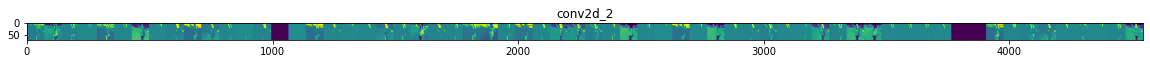

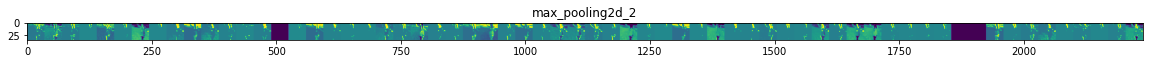

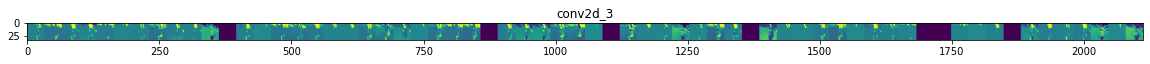

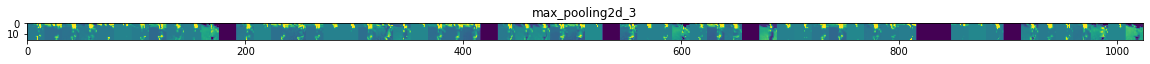

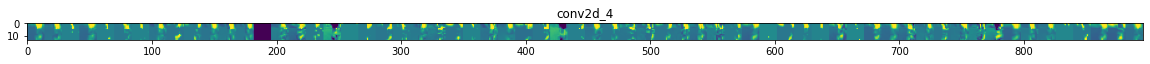

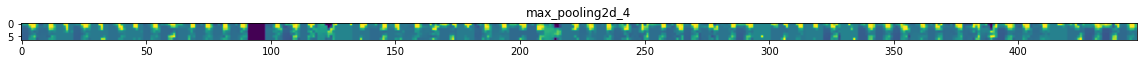

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# to terminate the kernel and free memory resources

import os, signal
os.kill(os.getpid(), signal.SIGKILL)

## Happy or Sad Exercise

**Exercise 4**

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. Create a convolutional neural network that trains to 100% accuracy on these images, which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [1]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/content/happy-or-sad.zip"

--2021-10-07 06:33:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/content/happy-or-sad.zip’

/content/happy-or-s 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2021-10-07 06:33:24 (125 MB/s) - ‘/content/happy-or-sad.zip’ saved [2670333/2670333]



In [5]:
import os
import zipfile

zip_ref = zipfile.ZipFile("/content/happy-or-sad.zip", 'r')
zip_ref.extractall("/content/h-or-s")
zip_ref.close()

In [6]:
DESIRED_ACCURACY = 0.999

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [7]:
early_stopping    = EarlyStopping(monitor='loss', patience=7)
reduce_lr         = ReduceLROnPlateau(monitor='loss', patience=7, min_lr=0.001, mode='min', verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='loss', filepath='./best_model.h5', save_best_only=True)

In [8]:
img_height = 150
img_width = 150
num_classes = 1

In [9]:
model = Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

optimizer   = tf.keras.optimizers.RMSprop(learning_rate=0.001)
loss        = tf.keras.losses.BinaryCrossentropy()
metrics     = ['accuracy']

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                                        "/content/h-or-s",  
                                        target_size=(150, 150), 
                                        batch_size=10,
                                        seed=20,
                                        class_mode='binary')

Found 80 images belonging to 2 classes.


In [13]:
epochs = 15
callbacks = [myCallback(), early_stopping, reduce_lr, model_checkpoint]

In [14]:
history = model.fit(train_generator,
                  # steps_per_epoch=2,
                    verbose = 1,
                    epochs = epochs,
                    callbacks = callbacks)

Epoch 1/15
8/8 [==============================] - 2s 26ms/step - loss: 1.9912 - accuracy: 0.5500
Epoch 2/15
8/8 [==============================] - 0s 25ms/step - loss: 0.5952 - accuracy: 0.6875
Epoch 3/15
8/8 [==============================] - 0s 28ms/step - loss: 0.3326 - accuracy: 0.8875
Epoch 4/15
8/8 [==============================] - 0s 28ms/step - loss: 0.1746 - accuracy: 0.9250
Epoch 5/15
8/8 [==============================] - 0s 29ms/step - loss: 0.0840 - accuracy: 0.9750
Epoch 6/15
8/8 [==============================] - 0s 28ms/step - loss: 0.0915 - accuracy: 0.9500
Epoch 7/15
8/8 [==============================] - 0s 27ms/step - loss: 0.0407 - accuracy: 0.9875
Epoch 8/15
8/8 [==============================] - 0s 26ms/step - loss: 0.1107 - accuracy: 0.9750
Epoch 9/15
8/8 [==============================] - 0s 28ms/step - loss: 0.0167 - accuracy: 1.0000

Reached 99.9% accuracy so cancelling training!
